In [1]:
import sys
import math
from queue import Queue
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Graph:
    def __init__(self, nodes, edges, gw):
        self.nodes = nodes
        self.edges = edges
        self.gw = gw
        self.adj_list = {node: [] for node in self.nodes}
        for edge in self.edges:
            self.adj_list[edge[0]].append(edge[1])
            self.adj_list[edge[1]].append(edge[0])

    def remove_edge(self, edge):
        self.adj_list[edge[0]].remove(edge[1])
        self.adj_list[edge[1]].remove(edge[0])
        for e in self.edges:
            if edge[0] in e and edge[1] in e:
                self.edges.remove(e)
                break
    
    def get_neighbors(self, node):
        return self.adj_list[node]

    def get_gw_neighbors(self, node):
        gw_neighbors = []
        for i in self.get_neighbors(node):
            if i in self.gw:
                gw_neighbors.append(i)
        return gw_neighbors
    
    
    def viz(self, si, dn):
        # Create a NetworkX graph object from the Graph class object
        G = nx.Graph()
        for node in self.nodes:
            G.add_node(node)
        for edge in self.edges:
            G.add_edge(edge[0], edge[1])
        # Create a dictionary of node colors based on whether the node is in l_init or not
        # node_colors = {node: 'y' if node in self.gw else 'g' if node == si else 'r' if node in [n[0] for n in self.get_list_death_nodes(si)] else 'b' for node in self.nodes}
        if dn == False:
            node_colors = {node: 'y' if node in self.gw else 'g' if node == si else 'b' for node in self.nodes}
        else:   
            node_colors = {node: 'y' if node in self.gw else 'g' if node == si else 'r' if node in [n[0] for n in self.get_list_death_nodes(si)] else 'b' for node in self.nodes}
        # Create a list of edge colors based on whether the edge is in l_gw or not
        edge_colors = ['r' if self.get_edge_weight(edge)==0 else 'k' for edge in self.edges]
        # Calculate the spring layout of the graph to minimize edge crossings
        pos = nx.spring_layout(G, k=0.5, iterations=10000)
        # Draw the graph
        nx.draw_networkx_nodes(G, pos, node_size=300, node_color=list(node_colors.values()))
        nx.draw_networkx_edges(G, pos, edgelist=self.edges, edge_color=edge_colors)
        nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
        plt.axis('off')
        plt.show()

    def get_edge_weight(self, edge):
        if self.get_gw_neighbors(edge[0]) != [] and self.get_gw_neighbors(edge[1]) != []:
            return 0
        else:
            return 1
    
    def get_zero_weighted_subgraph(self):
        zero_weighted_edges = []
        nodes_in_zero_weighted_edges = set()

        # Iterate over all edges in the graph and add any 0-weighted edges to our list
        for edge in self.edges:
            if self.get_edge_weight(edge) == 0:
                zero_weighted_edges.append(edge)
                nodes_in_zero_weighted_edges.add(edge[0])
                nodes_in_zero_weighted_edges.add(edge[1])

        # Create a new graph containing only the zero-weighted edges and nodes
        zero_weighted_graph = Graph(list(nodes_in_zero_weighted_edges), zero_weighted_edges, self.gw)

        return zero_weighted_graph
    

    def get_distance_from_node(self, si):
        # Initialize the distances dictionary
        distances = {node: float('inf') for node in self.nodes}
        distances[si] = 0

        # Initialize the queue for BFS
        queue = deque()
        queue.append(si)

        # BFS traversal
        while queue:
            curr_node = queue.popleft()
            for neighbor in self.adj_list[curr_node]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[curr_node] + 1
                    queue.append(neighbor)
        return distances
    
    def get_list_death_nodes(self, si):
        return sorted([[i, len(self.get_gw_neighbors(i)), self.get_distance_from_node(si)[i]] for i in range(len(self.nodes)) if len(self.get_gw_neighbors(i))>1], key=lambda x: x[2])


    


In [3]:
si = 2
l_init = [37, 81, 4]
n_nodes = l_init[0]
l_nodes = [i for i in range(n_nodes)]
l_edges = [[2, 5], [14, 13], [16, 13], [19, 21], [13, 7], [16, 8], [35, 5], [2, 35], [10, 0], [8, 3], [23, 16], [0, 1], [31, 17], [19, 22], [12, 11], [1, 2], [1, 4], [14, 9], [17, 16], [30, 29], [32, 22], [28, 26], [24, 23], [20, 19], [15, 13], [18, 17], [6, 1], [29, 28], [15, 14], [9, 13], [32, 18], [25, 26], [1, 7], [34, 35], [33, 34], [27, 16], [27, 26], [23, 25], [33, 3], [16, 30], [25, 24], [3, 2], [5, 4], [31, 32], [27, 25], [19, 3], [17, 8], [4, 2], [32, 17], [10, 11], [29, 27], [30, 27], [6, 4], [24, 15], [9, 10], [34, 2], [9, 7], [11, 6], [33, 2], [14, 10], [12, 6], [0, 6], [19, 17], [20, 3], [21, 20], [21, 32], [15, 16], [0, 9], [23, 27], [11, 0], [28, 27], [22, 18], [3, 1], [23, 15], [18, 19], [7, 0], [19, 8], [21, 22], [7, 36], [13, 36], [8, 36]]
l_gw = [0, 16, 18, 26]
graph = Graph(l_nodes, l_edges, l_gw)

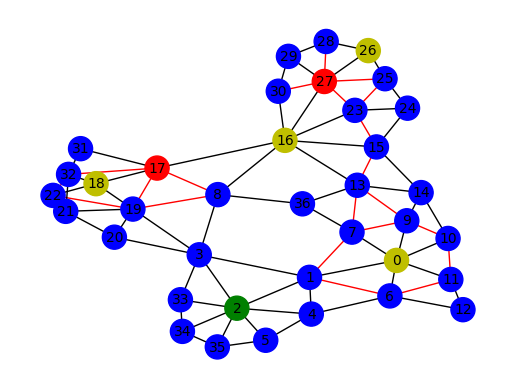

In [4]:
graph.viz(si,True)

In [10]:
sub_graph = graph.get_zero_weighted_subgraph()
sub_nodes = sorted([node for node in sub_graph.nodes], key=lambda x: graph.get_distance_from_node(si)[x])
edge_to_cut = [sub_nodes[0], graph.get_gw_neighbors(sub_nodes[0])[0]]
graph.remove_edge(edge_to_cut)
edge_to_cut


[8, 16]

In [6]:
si=3

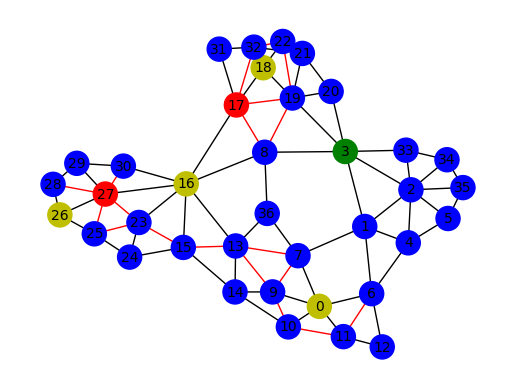

In [7]:
graph.viz(si,True)

In [9]:
graph.get_list_death_nodes(si)

[[17, 2, 2], [27, 2, 3]]

In [190]:
sub_graph = graph.get_zero_weighted_subgraph()
sub_nodes = sorted([[node, graph.get_distance_from_node(si)[node]] for node in sub_graph.nodes], key=lambda x: x[1])
sub_nodes

[[8, 1],
 [19, 1],
 [6, 2],
 [7, 2],
 [17, 2],
 [22, 2],
 [32, 3],
 [9, 3],
 [11, 3],
 [13, 3],
 [15, 3],
 [23, 3],
 [27, 3],
 [30, 3],
 [10, 4],
 [25, 4],
 [28, 4]]

In [173]:
sub_graph = graph.get_zero_weighted_subgraph()
sub_nodes = sorted([node for node in sub_graph.nodes], key=lambda x: graph.get_distance_from_node(si)[x])
edge_to_cut = [sub_nodes[0], graph.get_gw_neighbors(sub_nodes[0])[0]]
for e in graph.edges:
    if edge_to_cut[0] in e and edge_to_cut[1] in e:
        edge_to_cut = e
graph.remove_edge(edge_to_cut)
edge_to_cut 

[16, 8]

In [160]:
edge_to_cut

[16, 8]